In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import viz

from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerTuple
from scipy.stats import linregress
from viz import AX_FACECOLOR

colors = viz.plotting_style()
lin_colors = list(colors.values())

plt.style.use('style.mpl')

# Code generating Figure 7
Figure 7 shows that quantified proteomes are more reduced during faster growth for E. coli, yeast and a model cyanobacterium. Moreover, in E. coli this trend appears to compensate for the relative oxidation of biomass due to increasing RNA content. 

In [2]:
# Read in a combined dataframe of all the coding sequence NOSC values.
long_nosc_df = pd.read_csv('../data/genomes/all_ref_prot_NOSC.csv')

# Amino acid properties
aa_nosc_df = pd.read_csv('../data/aa_nosc.csv')

# Single files per-organism of proteome level Z_C at different growth rates.
coli_data = pd.read_csv('../data/proteomes/Coli/Chure_proteome_NOSC.csv')
yeast_data = pd.read_csv('../data/proteomes/Scer/Xia_proteome_NOSC.csv')
cyano_data = pd.read_csv('../data/proteomes/Synechocystis/Zavrel_proteome_NOSC.csv')

# Unified file of the protein-level measurements.
all_expression_data = pd.read_csv('../data/proteomes/all_protein_measurements.csv')

/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_33321/4237605842.py:13: DtypeWarning: Columns (0,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  all_expression_data = pd.read_csv('../data/proteomes/all_protein_measurements.csv')


In [3]:
# extract schmidt 2016 data in chemostat_conds
mask = np.logical_and(coli_data.condition == 'glucose_minimal',
                      coli_data.dataset == 'schmidt_2016')
mask = np.logical_or(mask, coli_data.condition.str.startswith('chemostat'))
coli_schmidt_chemostat = coli_data[mask].copy()

# extract schmidt 2016 minimal media non-stress conds
mm_conds = 'glucose,fructose,galactose,glucosamine,xylose,mannose,glycerol,succinate,fumarate,pyruvate,acetate'.split(',')
mask = np.logical_and(coli_data.condition.isin(mm_conds), 
                      coli_data.dataset == 'schmidt_2016')
coli_schmidt_batch = coli_data[mask].copy()

# Extract the ribosome profiling data from li 2014
mask = coli_data.dataset == 'li_2014'
coli_li = coli_data[mask].copy()

# Extract the MS data from valgepea 2013
mask = coli_data.dataset == 'valgepea_2013'
coli_valgepea = coli_data[mask].copy()

# Extract the MS data from peebo 2015
mask = coli_data.dataset == 'peebo_2015'
coli_peebo = coli_data[mask].copy()



LinregressResult(slope=-0.0081348076694548, intercept=-0.14210962621103426, rvalue=-0.8024423243420602, pvalue=0.00031799947608555056, stderr=0.0016777970573781005, intercept_stderr=0.0007286740419413375)


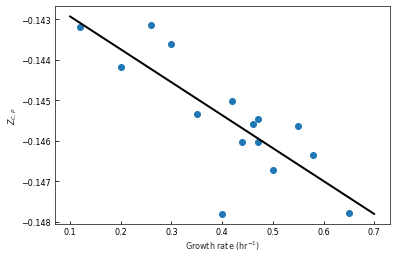

In [4]:
# Put all the plotting E. coli conditions into one dataframe.
coli_schmidt_all_conds = pd.concat([coli_schmidt_chemostat, coli_schmidt_batch])

# What is the relationship between growth rate and Z_C?
schmidt_lambda_ZCP_regression = linregress(coli_schmidt_all_conds.growth_rate_hr, coli_schmidt_all_conds.proteome_NOSC)
print(schmidt_lambda_ZCP_regression)

# plot the data
plt.plot(coli_schmidt_all_conds.growth_rate_hr, coli_schmidt_all_conds.proteome_NOSC, 'o')
# plot the regression line
xs = np.linspace(0.1, 0.7, 100)
pred_ys = schmidt_lambda_ZCP_regression.intercept + schmidt_lambda_ZCP_regression.slope * xs
plt.plot(xs, pred_ys, 'k-')
plt.xlabel('Growth rate (hr$^{-1}$)')
plt.ylabel('$Z_{C,P}$')
plt.show()

In [5]:
# Load biomass macromolecular composition from Bremer & Dennis 2008
biomass_percent_df = pd.read_csv('../data/physiology/BremerDennis2008_BiomassComposition_pct.csv', index_col=0)
biomass_percent_df

,protein_percent,RNA_percent,DNA_percent,doubling_time_min,doubling_time_hr,growth_rate_hr,remainder_percent
t_100_min,60.176991,10.176991,3.362832,100.0,1.667,0.416,26.283186
t_60_min,57.219251,11.764706,2.540107,60.0,1.000,0.693,28.475936
t_40_min,53.153153,13.693694,2.162162,40.0,0.667,1.040,30.990991
t_30_min,50.000000,16.537468,1.899225,30.0,0.500,1.386,31.563307
t_24_min,46.796960,19.543974,1.867535,24.0,0.400,1.733,31.791531
t_20_min,41.642229,20.918866,1.896383,20.0,0.333,2.079,35.542522


In [6]:
# Load estimated ZC changes.
# These file is generated by the script munge/munge_biomass_composition.py
inferred_ZCBs = pd.read_csv('../data/physiology/BremerDennis2008_InferredZCB.csv', index_col=0)
inferred_ZCBs.head()

,protein_mass_fraction,RNA_mass_fraction,DNA_mass_fraction,doubling_time_min,doubling_time_hr,growth_rate_hr,remainder_mass_fraction,protein_C_mass_fraction,RNA_C_mass_fraction,DNA_C_mass_fraction,remainder_C_mass_fraction,inferred_ZCB
t_100_min,0.601770,0.101770,0.033628,100.0,1.667,0.416,0.262832,0.614499,0.060604,0.021964,0.302934,-0.024453
t_60_min,0.572193,0.117647,0.025401,60.0,1.000,0.693,0.284759,0.584792,0.070118,0.016604,0.328485,-0.014650
t_40_min,0.531532,0.136937,0.021622,40.0,0.667,1.040,0.309910,0.545154,0.081903,0.014184,0.358760,0.000450
t_30_min,0.500000,0.165375,0.018992,30.0,0.500,1.386,0.315633,0.518219,0.099954,0.012590,0.369236,0.019780
t_24_min,0.467970,0.195440,0.018675,24.0,0.400,1.733,0.317915,0.491194,0.119629,0.012537,0.376639,0.041510


LinregressResult(slope=0.05078241914933014, intercept=-0.04884766783522326, rvalue=0.9967851540235625, pvalue=1.5486238884556037e-05, stderr=0.0020409275300271065, intercept_stderr=0.0027610954943520813)


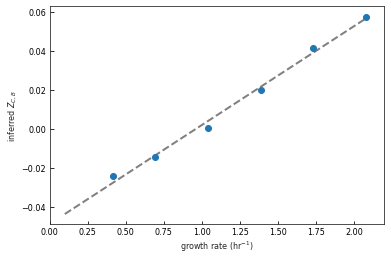

In [7]:
# Do a regression to fit the trend with growth rate. 
reg_xs = inferred_ZCBs.growth_rate_hr.values.astype(float)
reg_ys = inferred_ZCBs.inferred_ZCB.astype(float)
lambda_ZCB_regression = linregress(reg_xs, reg_ys)
print(lambda_ZCB_regression)

# Peek at the results
lams = np.linspace(0.1, 2.1, 100)
plt.plot(lams, lambda_ZCB_regression.intercept + lambda_ZCB_regression.slope*lams, ls='--', color='grey')
plt.plot(reg_xs, reg_ys, 'o')
plt.xlabel('growth rate (hr$^{-1}$)')
plt.ylabel('inferred $Z_{C,B}$')
plt.show()

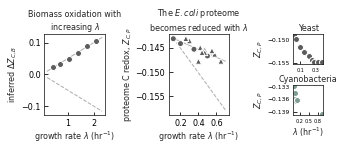

In [8]:
##### Figure 7 -- proteins expressed during faster growth are more reduced
mosaic = 'ABC\nABD'
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4.76, 2.2), width_ratios=[1,1,0.5])

pal = sns.color_palette()
greys = sns.color_palette('Greys')

plt.sca(axs['A'])
lams = np.linspace(0.2, 2.3, 100)
# Estimate ZC changes relative to lambda = 0, i.e. the intercept of the regression
dZCB = lambda_ZCB_regression.slope*lams
plt.plot(lams, dZCB, ls='-', color=greys[2], lw=1)
plt.plot(inferred_ZCBs.growth_rate_hr,
         inferred_ZCBs.inferred_ZCB - lambda_ZCB_regression.intercept, 'o',
         color=greys[-2], markeredgecolor='w', markersize=6, lw=1)
plt.plot(lams, -dZCB, ls='--', color=greys[2], lw=1)

plt.xlabel('growth rate $\lambda$ (hr$^{-1}$)')
plt.ylabel('inferred $\Delta Z_{C,B}$')
plt.title('Biomass oxidation with\n increasing $\lambda$')

# E. coli proteomes from Schmidt 2016
plt.sca(axs['B'])

# Plot expectations from biomass composition
# We assume a diffuse mechanism where every component of the biomass is 
# as likely to be compensatorily reduced as any other component. Hence
# the factor of -0.5 applied to the slope: protein is about 1/2 of biomass.
min_lambda = coli_schmidt_chemostat.growth_rate_hr.min()
min_fit_zcp = schmidt_lambda_ZCP_regression.intercept + schmidt_lambda_ZCP_regression.slope*min_lambda
lams = np.linspace(min_lambda, 0.71, 10)
expected_ZCP = (-0.5)*lambda_ZCB_regression.slope*(lams-min_lambda) + min_fit_zcp
plt.plot(lams, expected_ZCP, ls='--', color=greys[2], lw=1, zorder=-10)

# Plot the regression line for the E. coli data
lams = np.linspace(0.1, 0.7, 10)
fit_ZCPs = schmidt_lambda_ZCP_regression.intercept + schmidt_lambda_ZCP_regression.slope*lams
plt.plot(lams, fit_ZCPs, ls='-', color=greys[2], lw=1, zorder=-10)

# Plot the data -- chemostat
sns.scatterplot(data=coli_schmidt_chemostat, x='growth_rate_hr', y='proteome_NOSC',
                style='dataset', markers='o', edgecolor='w', color=greys[-2], linewidth=1,
                legend=False)
# Plot the data -- batch
n_conds_batch = coli_schmidt_batch.condition.unique().size
sns.scatterplot(data=coli_schmidt_batch, x='growth_rate_hr', y='proteome_NOSC',
                style='dataset', markers='^', edgecolor='w', color=greys[-2], linewidth=1,
                legend=False)

plt.title('The $E. coli$ proteome\nbecomes reduced with $\lambda$')
plt.ylabel('proteome C redox, $Z_{C,P}$')
plt.xlabel('growth rate $\lambda$ (hr$^{-1}$)')
# one significant figure on x ticks
plt.xticks([0.2, 0.4, 0.6])


# Make two vertically stacked 
# S. cerevisiae proteome data from Xia 2016
plt.sca(axs['C'])
sns.scatterplot(data=yeast_data, x='growth_rate_hr', y='proteome_NOSC',
                edgecolor='w', color=greys[-2], linewidth=1)
plt.title('Yeast')
plt.xlabel('')
plt.ylabel('$Z_{C,P}$')
plt.xticks([0.1, 0.3], fontsize=5)
plt.yticks(fontsize=6)

# Cyanobacterial proteome data from Zavrel 2019
plt.sca(axs['D'])
# Color by light intensity
n_intensities = cyano_data.red_light_intensity_uE_m_s.unique().size
sns.scatterplot(data=cyano_data, x='growth_rate_hr', y='proteome_NOSC',
                edgecolor='w', linewidth=1, color=colors['dark_green'],
                legend=False)
plt.title('Cyanobacteria')
plt.ylabel('$Z_{C,P}$')
plt.xlabel('$\lambda$ (hr$^{-1}$)')
plt.xticks([0.2, 0.5, 0.8], fontsize=5)
plt.yticks([-0.133, -0.136, -0.139], fontsize=6)

plt.tight_layout()
plt.subplots_adjust(hspace=0.7)
plt.savefig('../output/Fig7.pdf', facecolor='w', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Load results of lasso regression analysis for varying regularization strength alpha
# Files generated by munge/sparse_reconstruct_ZCP.py
regression_results_df = pd.read_csv('../output/sparse_reg/all_lasso_regression.csv')
regression_results_df['var_explained_pct'] = 100*regression_results_df.r2

# Load COG category analysis at alpha = 1e-8 
long_cat_counts_df = pd.read_csv('../output/sparse_reg/long_lasso_regression_COG_counts_alpha=1e-08.csv')

# Load COG category metadata
COG_cats = pd.read_csv('../data/COG-fun-20.csv').set_index('category')

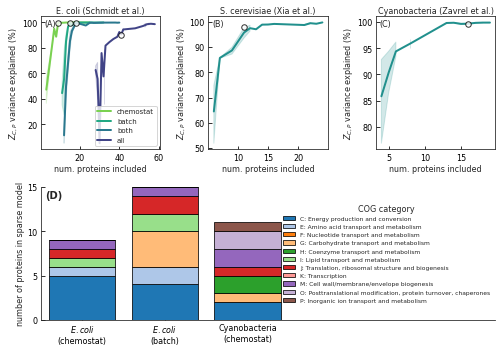

In [10]:
##### Supplementary Fig -- reconstruction of proteome NOSC requires > 5 proteins with distinct functions 
organism_dict = dict(coli='E. coli (Schmidt et al.)', yeast='S. cerevisiae (Xia et al.)', PCC6803='Cyanobacteria (Zavrel et al.)')

mosaic = ['A,B,C'.split(','), 'D,D,D'.split(',')]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(7.08,5))

for i, org in zip('ABC', 'coli,yeast,PCC6803'.split(',')):
    plt.sca(axs[i])
    # Get the regression results for this organism, 
    # only considering cases where the model explains some variance
    mask = np.logical_and(
        regression_results_df.organism_key == org,
        regression_results_df.var_explained_pct > 0)
    sns.lineplot(data=regression_results_df[mask], x='number_nonzero', y='var_explained_pct',
                 hue='conditions_included', palette='viridis_r')

    # Highlight the results for alpha = 1e-8
    mask = np.logical_and(
        mask, (regression_results_df.alpha-1e-08).abs() < 1e-10)
    plt.scatter(regression_results_df[mask].number_nonzero, regression_results_df[mask].var_explained_pct,
                s=30, color='w', edgecolor='k', linewidth=1, zorder=10, alpha=0.8)

    plt.legend(title=None, loc=4)
    if org != 'coli':
        plt.legend().set_visible(False)

    plt.xlabel('num. proteins included')
    plt.ylabel('$Z_{C,P}$ variance explained (%)')
    plt.title(organism_dict[org])
    plt.text(0.03, 0.98, '({0})'.format(i), transform=plt.gca().transAxes, fontsize=8, va='top')

plt.sca(axs['D'])
pal = sns.color_palette('tab20')
j = 0
# Consider only the bacteria since the eukaryotes don't get COG categories
conds = 'coli_chemostat,coli_batch,PCC6803_chemostat'.split(',')
labels = '$E. coli$\n(chemostat),$E. coli$\n(batch),Cyanobacteria\n(chemostat)'.split(',')
n_conds = len(conds)

bottom = np.zeros(n_conds)
xs = np.arange(n_conds)
cat_order = sorted(COG_cats.index.values)
for i, cat in enumerate(cat_order):
    cat_desc = COG_cats.loc[cat].description
    masked = long_cat_counts_df[long_cat_counts_df.COG_category == cat].set_index('organism_condition')
    if masked.number_proteins.sum() == 0:
        continue

    ys = masked.loc[conds].number_proteins.values
    label = '{0}: {1}'.format(cat, cat_desc)
    plt.bar(xs, ys, bottom=bottom, color=pal[j], label=label, edgecolor='k', linewidth=0.75)
    bottom += ys
    j += 1

plt.xlim(-0.5, n_conds+2)
plt.xticks(xs, labels, ha='center')
plt.ylabel('number of proteins in sparse model')
plt.yticks(np.arange(0, 15.1, 5))
plt.text(0.01, 0.98, '(D)', transform=plt.gca().transAxes, fontweight='bold', fontsize=10, va='top')

l = plt.legend(loc='center right', title='COG category', fontsize=6, frameon=False)
plt.setp(l.get_title(), fontsize=8)
sns.despine(ax=plt.gca())

plt.tight_layout()
plt.savefig('../output/FigSX_sparse_ZC_reconstruction.png', facecolor='w', dpi=300)
plt.show()

In [11]:
# Read lipid redox data from Marr 1962 -- they measured only FA composition
# not total FA content as a fraction of dry weight or C. 
# File generated by munge/munge_coli_lipids.py
total_lipids_marr = pd.read_csv('../data/lipids/Coli/Marr1962_total_lipids_NOSC.csv')

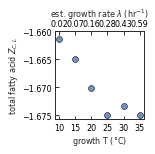

In [12]:
# SI figure about growth rate dependence of lipid composition
# Model for T-dependent growth rate of E. coli in a similar glucose
# minimal medium to Marr. See Table 1 of Gill 1985 for fit parameters 
b = 0.0262
c = 0.298
Tmax = 47.3
Tmin = 4.9
temps = np.arange(10, 36, 5)
RHS = b*(temps-Tmin)*(1-np.exp(c*(temps-Tmax)))
pred_mu = np.power(RHS, 2)

# Plot T on the primary X axis, inferred growth rate on the top X axis
plt.figure(figsize=(2.24,2.25))

mask = total_lipids_marr.experiment == 'temp'
# The fit from Gill 1985 has a max around 40 C
mask = np.logical_and(mask, total_lipids_marr.temp_C < 36)
plt.scatter(total_lipids_marr[mask].temp_C, total_lipids_marr[mask].lipid_NOSC,
            label='Marr 1962', edgecolor='k', lw=0.5, color=colors['blue'])

plt.xlabel('growth T ($\degree$C)')
plt.ylabel('total fatty acid $Z_{C,L}$')
xlim = plt.xlim()
plt.xticks(temps)
plt.yticks(-np.arange(1.66, 1.676, 0.005))

plt.twiny()

plt.xticks(temps, np.round(pred_mu, 2))
plt.xlim(xlim)
plt.xlabel('est. growth rate $\lambda$ (hr$^{-1}$)')

plt.tight_layout()
plt.savefig('../output/FigSX_lipid_ZC.png', facecolor='w', dpi=300)
plt.show()

In [13]:
# Reading the monte-carlo samples of proteome NOSC per-genome.
# Generated by munge/cds_monte_carlo.py
unweighted_nosc_est_df = pd.read_csv('../data/genomes/all_ref_prot_NOSC_unweighted_monte_carlo_samples.csv')

# These are "weighted" i.e. allowing for 5 order of variation in expression.
# Generated by munge/cds_monte_carlo.py
weighted_nosc_est_df = pd.read_csv('../data/genomes/all_ref_prot_NOSC_weighted_monte_carlo_samples.csv')

coli mean: -0.15 +/- 0.00
yeast mean: -0.15 +/- 0.00
PCC6803 mean: -0.14 +/- 0.00
coli mean: -0.15 +/- 0.00
yeast mean: -0.15 +/- 0.00
PCC6803 mean: -0.14 +/- 0.00


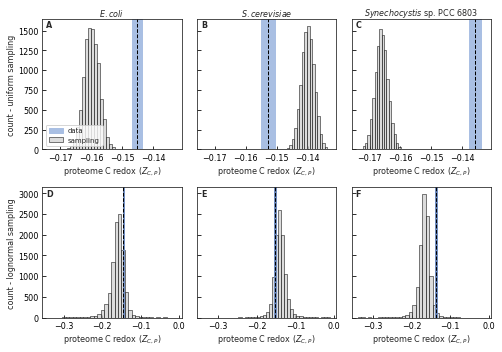

In [14]:
##### Supplementary Fig -- coding sequences are not a good predictor of $Z_{C,P}$
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(7.08,5), sharey='row', sharex='row')
flat_axs = axs.flatten()

coli_vals = coli_data[coli_data.proteome_NOSC.notnull()].proteome_NOSC.values
yeast_vals = yeast_data[yeast_data.proteome_NOSC.notnull()].proteome_NOSC.values
cyano_vals = cyano_data[cyano_data.proteome_NOSC.notnull()].proteome_NOSC.values
means_dict = dict(coli=coli_vals.mean(), yeast=yeast_vals.mean(), PCC6803=cyano_vals.mean())
stds_dict = dict(coli=coli_vals.std(), yeast=yeast_vals.std(), PCC6803=cyano_vals.std())

# Top row compares unweighted sampling to measurements of proteome NOSC
order = 'coli,yeast,PCC6803'.split(',')
labels = dict(coli='$E. coli$', yeast='$S. cerevisiae$', PCC6803='$Synechocystis$ sp. PCC 6803')
for i, org in enumerate(order):
    plt.sca(axs[0, i])
    samples = unweighted_nosc_est_df[unweighted_nosc_est_df.organism == org]
    sns.histplot(data=samples, x='NOSC', bins=20, color=greys[1], edgecolor='k', linewidth=0.5, label='sampling')
    plt.title(labels[org])
    plt.xlabel('proteome C redox ($Z_{C,P}$)')

    print('{0} mean: {1:.2f} +/- {2:.2f}'.format(org, means_dict[org], stds_dict[org]))
    plt.axvline(means_dict[org], color='k', ls='--', lw=1)
    plt.axvspan(means_dict[org]-stds_dict[org], means_dict[org]+stds_dict[org],
                color=colors['light_blue'], label='data')
    plt.legend().set_visible(False)

for i, org in enumerate(order):
    plt.sca(axs[1, i])
    samples = weighted_nosc_est_df[weighted_nosc_est_df.organism == org]
    sns.histplot(data=samples, x='NOSC', bins=30, color=greys[1], linewidth=0.5, edgecolor='k')
    plt.xlabel('proteome C redox ($Z_{C,P}$)')

    print('{0} mean: {1:.2f} +/- {2:.2f}'.format(org, means_dict[org], stds_dict[org]))
    plt.axvline(means_dict[org], color='k', ls='--', lw=1)
    plt.axvspan(means_dict[org]-stds_dict[org], means_dict[org]+stds_dict[org],
                color=colors['blue'])

panel_labels = 'ABCDEF'
for label, ax in zip('ABCDEF', flat_axs):
    plt.sca(ax)
    plt.text(0.03, 0.99, label, transform=plt.gca().transAxes,
             fontweight='bold', fontsize=8, va='top')
    
plt.sca(axs[0,0])
plt.ylabel('count - uniform sampling')
plt.legend(loc=3, framealpha=0.8).set_visible(True)
plt.sca(axs[1,0])
plt.ylabel('count - lognormal sampling')

plt.tight_layout()
plt.savefig('../output/FigSX_CDS_ZC_not_representative.png', facecolor='w', dpi=300)
plt.show()


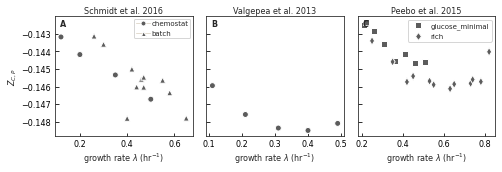

In [15]:
# Supplementary Figure -- plot all the E. coli datasets in one figure
# Shows that they are all consistent with the same trend.
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(7.08,2.5), sharey=True)
flat_axs = axs.flatten()

plt.sca(axs[0])
# Plot the data -- chemostat
sns.scatterplot(data=coli_schmidt_chemostat, x='growth_rate_hr', y='proteome_NOSC',
                style='dataset', markers='o', edgecolor='w', color=greys[-2], linewidth=1,
                legend=False)
# Plot the data -- batch
n_conds_batch = coli_schmidt_batch.condition.unique().size
sns.scatterplot(data=coli_schmidt_batch, x='growth_rate_hr', y='proteome_NOSC',
                style='dataset', markers='^', edgecolor='w', color=greys[-2], linewidth=1,
                legend=False)
legend_elements = [Line2D([0], [0], marker='o', color=AX_FACECOLOR, label='chemostat',
                          markerfacecolor=greys[-2], markeredgecolor='w',
                          linewidth=1, markersize=5),
                   Line2D([0], [0], marker='^', color=AX_FACECOLOR, label='batch',
                          markerfacecolor=greys[-2], markeredgecolor='w',
                          linewidth=1, markersize=5)]
plt.gca().legend(handles=legend_elements, loc=1,
                 handletextpad=0.2, borderaxespad=0.3, borderpad=0.3)
plt.title('Schmidt et al. 2016')
plt.xlabel('growth rate $\lambda$ (hr$^{-1}$)')
plt.ylabel('$Z_{C,P}$')

plt.sca(axs[1])
# Plot the data -- valgepea
sns.scatterplot(data=coli_valgepea, x='growth_rate_hr', y='proteome_NOSC',
                style='dataset', markers='o', edgecolor='w', color=greys[-2], linewidth=1,
                legend=False)
plt.title('Valgepea et al. 2013')
plt.xlabel('growth rate $\lambda$ (hr$^{-1}$)')

plt.sca(axs[2])
# Plot the data -- peebo 
sns.scatterplot(data=coli_peebo, x='growth_rate_hr', y='proteome_NOSC',
                style='condition', markers='sd', edgecolor='w', color=greys[-2], linewidth=1)
plt.title('Peebo et al. 2015')
plt.xlabel('growth rate $\lambda$ (hr$^{-1}$)')
plt.legend(loc=1, framealpha=0.8, title='')

panel_labels = 'ABC'
for label, ax in zip(panel_labels, flat_axs):
    plt.sca(ax)
    plt.text(0.04, 0.98, label, transform=plt.gca().transAxes,
             fontweight='bold', fontsize=8, va='top')

plt.tight_layout()
plt.savefig('../output/FigSX_coli_proteome_NOSC_datasets.png', facecolor='w', dpi=300)
plt.show()